# Principal Component Analysis

### by Yury Yanovich (2017-04-03)

This notebook consists of two parts. In the first the data is sampled from a Gaussian distribution and then analyzed with principal component analysis. In the second real date is used and analyzed with principal component analysis.

# PART 1

## 2D Model data

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Generate data

In [39]:
sample_size = 50                               # Number of data points. Play with this.
sample_dimensionality = 2                        # Dimensionality of data point. Do not change!

The data is generated by first sampling from an isotropic Gaussian distribution with zero mean and unit variance in all directions (whitened data) and then transforming the data by a random matrix and random mean. Coefficients of mean vector and transformation matrix are drawn from a normal distribution with variance one.

In [40]:
standard_data = np.random.normal(0, 1, 
    (sample_size, sample_dimensionality))                          # Initialize data with normal distribution (approximately whitened data).

initial_mean = np.random.normal(0, 1, sample_dimensionality)       # Initialize mean from normal distribution.

transformation_matrix = np.random.normal(0, 1, 
    (sample_dimensionality, sample_dimensionality))                # Create random transformation matrix.

data = np.dot(standard_data, transformation_matrix) + initial_mean # Transform initial data.

print("\nInitial data:\n", standard_data)
print("\nInitial mean:\n", initial_mean)
print("\nTransformation:\n", transformation_matrix)
print("\nData (transformed):\n", data)


Initial data:
 [[-3.1818772   1.12653884]
 [-0.83478179  0.67658246]
 [-0.3330465  -0.53522998]
 [ 1.1380355  -0.58154883]
 [-0.66988385  1.90011623]
 [-0.46453812  0.31407285]
 [ 0.3136003  -0.61776395]
 [ 0.10886724 -0.57421163]
 [-0.91816335  0.02406659]
 [ 1.09231972 -0.01253672]
 [-1.67708181  0.93173126]
 [-0.88670851 -1.45414539]
 [ 1.06394953  1.02822985]
 [ 0.1945847   0.8010662 ]
 [ 0.07167396 -1.83693214]
 [-0.24677218 -0.17385718]
 [ 0.97732617  0.39082911]
 [-0.49850458  0.53543879]
 [ 0.14182495  1.12804019]
 [-0.19511663 -0.44226285]
 [ 1.64859993  0.55555472]
 [ 1.11172388 -0.18889161]
 [-0.39826957  0.79664959]
 [-0.785955   -0.93056955]
 [ 0.20376605  0.99241079]
 [-0.34098083 -1.25034508]
 [-1.39857982 -0.73511027]
 [ 1.02766153  0.8573256 ]
 [ 0.67553587 -0.04928795]
 [ 0.75619891 -0.26060707]
 [-0.91430954  0.6560651 ]
 [ 0.00486376 -0.0822429 ]
 [-0.99096753 -0.4256429 ]
 [-0.14570193 -0.17284425]
 [-1.53399909  1.52745535]
 [ 1.53438971  1.17567044]
 [ 0.9175553

## Calculate mean and principal components of data

Hints: `np.average`, `np.dot`, `np.transpose`, and `np.linalg.eigh` might be useful here.  Use `print(np.<name>?)` to learn more about `<name>`.

In [35]:
np.linalg.eigh?

In [41]:
## EXERCISE 1

# Add missing code here.
# ...

sample_mean = np.average(data, axis=0)       # Data mean as list.
centered_data = data - sample_mean
sample_covariance = 1 / sample_size * np.dot(np.transpose(centered_data), centered_data) # Data covariance estimation as a 2x2 dimensional array.
eig_temp = np.linalg.eigh(sample_covariance)
eigen_vectors = eig_temp[1]     # Principal components as column (!) vectors in a 2x2 dimensional array.
lambdas = eig_temp[0]           # Variances along the principal components as components of a list.
print("\nNumerical mean of centered data (should be zero):\n", np.average(centered_data)) # Verify that data has zero mean.
print("\nWhich one is eigenvector?\n", eigen_vectors[0], "\n", eigen_vectors[:, 0])
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)

# SOLUTION

# EXERCISE END


Numerical mean of centered data (should be zero):
 -7.54951656745e-17

Which one is eigenvector?
 [-0.83160616  0.55536582] 
 [-0.83160616  0.55536582]

Variances:
 [ 0.28432856  2.76138157]

Estimation of covariance matrix:
 [[ 1.04832897  1.14401612]
 [ 1.14401612  1.99738117]]


## Calculate expected mean and principal components from transformation matrix and initial mean

Since the initial data has zero mean and variance one in all directions, it is possible to predict the data mean and principal components.

Since the initial mean has been added to the data after applying the transformation matrix $\textbf{T}$, the expected mean of the data is equal to the initial mean.
 
If the initial data points $\vec{\hat{x}}_i$ have zero mean and unit variance in all directions, they are whitened, i.e. their 2nd moment matrix is the identity matrix $\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i = \textbf{I}$.  The zero mean transformed data points $\vec{x}_i := \textbf{T}\vec{\hat{x}}_i $, i.e. before adding the initial mean, then have the 2nd moment matrix 
 \begin{eqnarray}
   \langle \vec{x}_i \vec{x}_i^T \rangle_i 
   &=& \langle \textbf{T}\vec{\hat{x}}_i \vec{\hat{x}}_i^T\textbf{T}^T \rangle_i \\
   &=& \textbf{T} \underbrace{\langle \vec{\hat{x}}_i \vec{\hat{x}}_i^T \rangle_i}_{\textbf{I}} \textbf{T}^T \\
   &=& \textbf{T} \textbf{T}^T \,. 
 \end{eqnarray}
Applying PCA to this matrix should yield a good approximation of the principal components and variances of the transformed data points and are in fact the exact expectation values as the number of data points goes to infinity.


In [42]:
## EXERCISE 2

# Add missing code here.
# ...
expected_mean = initial_mean              # Expected data mean as a list.
expected_covariance_matrix = np.dot(np.transpose(transformation_matrix), transformation_matrix) # Expected covariance matrix
exp_temp = np.linalg.eigh(expected_covariance_matrix)
pcVecExp = exp_temp[1]                   # Expected principal components as column vectors in a 2x2 dimensional array.
pcVarExp = exp_temp[0]                   # Expected variances along the principal components as components of a 2 dimensional vector.
print("\nExpected data mean:\n", expected_mean)
print("\nExpected covariance:\n", expected_covariance_matrix)
print("\nExpected principal components:\n", pcVecExp)
print("\nExpected variances:\n", pcVarExp)

# SOLUTION

# EXERCISE END


Expected data mean:
 [ 0.34500426  0.84679729]

Expected covariance:
 [[ 1.17504312  1.11655691]
 [ 1.11655691  1.8266653 ]]

Expected principal components:
 [[-0.80003681  0.59995092]
 [ 0.59995092  0.80003681]]

Expected variances:
 [ 0.33773246  2.66397596]


# Plot data and eigenvectors scaled by standard deviation and centered at mean

The following plot shows the data points in black, the true mean offset vector in yellow, the data mean vector in blue on top, the expected eigenvectors in green, and the data eigenvectors in red on top.  Since the polarity of the eigenvectors is arbitrary, they are plotted $\pm$.

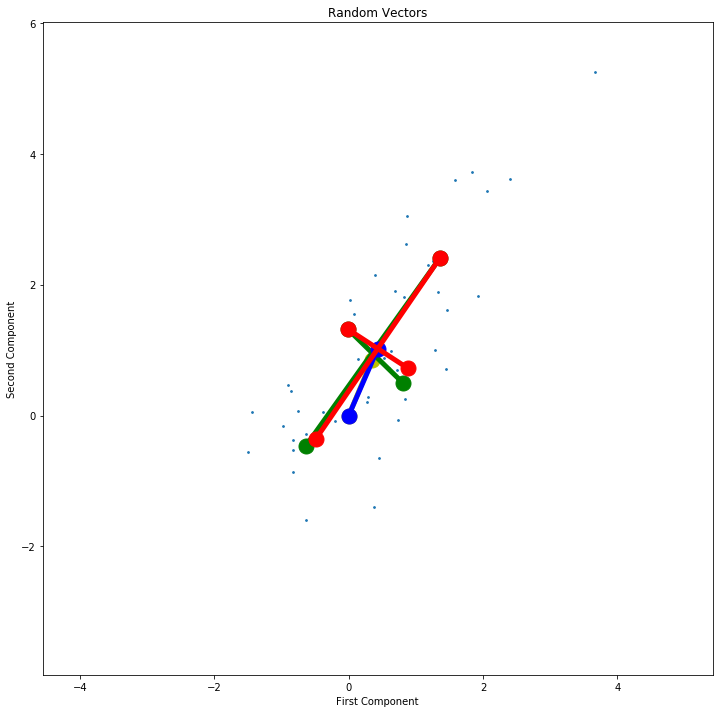

In [43]:
figure_handle = plt.figure(figsize=(12, 12))
subplot_handle = figure_handle.add_subplot(111)
root_lambdas = np.array([math.sqrt(x) for x in lambdas]) # Convert variances to standard deviations, ...
expected_root_lambdas = np.array([math.sqrt(x) for x in pcVarExp]) # ... also for the expected values.
plot_range = 3 * np.max(root_lambdas) # Take the largest standard deviation for the plot range.
subplot_handle.set(xlim = [sample_mean[0] - plot_range, sample_mean[0] + plot_range], 
                   ylim = [sample_mean[1] - plot_range, sample_mean[1] + plot_range], 
                   title='Random Vectors', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(data[:, 0], data[:, 1], s=3) # Plot data points.
subplot_handle.plot([0, expected_mean[0]], [0, expected_mean[1]],
    'yo-',markersize=15,linewidth=5) # Plot ground truth mean offset of the data in yellow.
for component in range(0, 2):
    subplot_handle.plot([expected_mean[0] - pcVecExp[0, component] * expected_root_lambdas[component], 
                         sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
            [expected_mean[1] - pcVecExp[1, component] * expected_root_lambdas[component],
             sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
            'go-',markersize=15,linewidth=5) # Plot expected eigenvectors scaled by standard deviation in green, ...
subplot_handle.plot([0, sample_mean[0]], [0, sample_mean[1]],
        'bo-',markersize=15,linewidth=5) # Plot data mean offset of the mixed data in blue.
for component in range(0,2):
    subplot_handle.plot([sample_mean[0] - eigen_vectors[0, component] * root_lambdas[component],
                         sample_mean[0] + eigen_vectors[0, component] * root_lambdas[component]], 
                        [sample_mean[1] - eigen_vectors[1, component] * root_lambdas[component], 
                         sample_mean[1] + eigen_vectors[1, component] * root_lambdas[component]],
                        'ro-', markersize=15, linewidth=5) # ... and data eigenvectors in red on top.
plt.show()

## Whiten the data

Knowing the mean, principal components and variances of the data allows us to whiten the data, i.e. normalize it such that it has zero mean and unit variance in all directions.

In [37]:
## EXERCISE 3

# Add missing code here.
# ...
v = [1/np.sqrt(l) for l in lambdas]
d = np.diag(v)
whitening_matrix = np.dot(d, eigen_vectors) # Whitening matrix as a 2 x 2 dimensional array.
whitened_data = np.dot(data - sample_mean, np.transpose(whitening_matrix))  # Whitened data as a 2 x sample_size dimensional array.
print("\nWhitening matrix:\n", whitening_matrix)
print("\nWhitened data:\n", whitened_data)

# SOLUTION

# EXERCISE END


Whitening matrix:
 [[-0.64283883 -0.35014077]
 [-0.16007414  0.29388715]]

Whitened data:
 [[ -8.65862598e-01   2.98025938e-01]
 [ -1.37187199e-01   1.12268994e+00]
 [ -1.04425271e+00   1.51365319e+00]
 [ -6.69223219e-01   1.43887087e+00]
 [ -1.08967163e+00  -2.53953992e-02]
 [ -1.13997843e+00   7.91266028e-02]
 [ -8.90114181e-02  -1.30184092e+00]
 [  2.35233153e+00  -7.23497594e-01]
 [ -9.05789698e-02   3.15286907e-02]
 [  7.14522588e-02   2.24523922e-01]
 [ -7.68293333e-01   1.46543067e+00]
 [ -1.15738215e+00  -9.80489976e-01]
 [ -3.77107880e-02  -1.91080401e+00]
 [ -6.57340380e-01  -4.23753779e-02]
 [ -1.94567782e+00   7.78747463e-01]
 [ -1.64454047e+00   1.36443372e+00]
 [ -6.42066460e-01   1.06649314e+00]
 [  1.81220055e+00  -9.32228063e-01]
 [ -4.67322517e-01   2.14126265e-01]
 [ -1.59003759e+00   8.29479271e-01]
 [ -1.01953029e+00  -2.78057450e-01]
 [ -5.93387718e-01  -5.08188743e-01]
 [  1.27232979e+00  -1.69075628e+00]
 [ -5.76576861e-01   8.66300121e-01]
 [  3.20431360e-01  

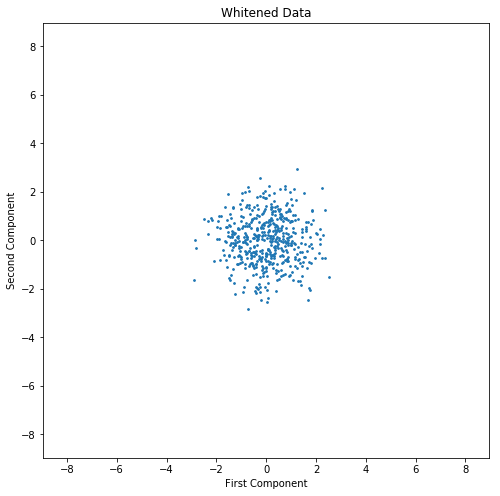

In [38]:
figure_handle = plt.figure(figsize=(8,8))
subplot_handle = figure_handle.add_subplot(111)
plotRange = 4
subplot_handle.set(xlim=[-plot_range, +plot_range], ylim=[-plot_range, +plot_range], 
                   title='Whitened Data', xlabel='First Component', ylabel='Second Component')
subplot_handle.scatter(whitened_data[:, 0], whitened_data[:, 1], s=3) # Plot data points.
plt.show()

## Exercise 4

Vary the number of data points and observe how much the solution depends on it.

### Solution

I find it amazing how robust the solution is to the number of data points.  In some sense the mean seams more sensitive than the eigenvectors.

## Exercise 5

Make your previous experiments repeatable.

In [44]:
## Bad usage
print("-"*80)
print("\nBad usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    np.random.seed(0)
    print(np.random.normal())
    print(np.random.normal())
    print("Code after")
    print(np.random.normal())
    print(np.random.normal())

## Good usage
print("-"*80)
print("\nGood usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    current_state = np.random.get_state()
    np.random.seed(0)
    print(np.random.normal(1))
    print(np.random.normal(1))
    np.random.set_state(current_state)
    print("Code after")
    print(np.random.normal())
    print(np.random.normal(1))

--------------------------------------------------------------------------------

Bad usage example

Experiment № 0
Our code
1.764052345967664
0.4001572083672233
Code after
0.9787379841057392
2.240893199201458
Experiment № 1
Our code
1.764052345967664
0.4001572083672233
Code after
0.9787379841057392
2.240893199201458
--------------------------------------------------------------------------------

Good usage example

Experiment № 0
Our code
2.764052345967664
1.4001572083672233
Code after
1.8675579901499675
0.022722120123588985
Experiment № 1
Our code
2.764052345967664
1.4001572083672233
Code after
0.9500884175255894
0.8486427917023021


# PART 2

## PCA for real data

### 1. Airfoils

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline

In [2]:
data = np.loadtxt('airfoils.csv', delimiter=',')
ref_points = np.loadtxt('ref_points.csv', delimiter=',')
test_point = np.loadtxt('test_afl.csv', delimiter=',')
print(data)

[[ 0.          0.00034873  0.00087806 ..., -0.00087806  0.         -0.00034873]
 [ 0.          0.0025839   0.0058062  ...,  0.0011505   0.          0.00093568]
 [ 0.00093364  0.0023877   0.0042779  ..., -0.0037593   0.00093364
  -0.0023783 ]
 ..., 
 [ 0.0019954   0.0037583   0.0059576  ...,  0.00012411  0.0019954
  -0.00073109]
 [ 0.          0.0020968   0.0043743  ..., -0.0018331   0.         -0.00095618]
 [ 0.          0.0017345   0.0040769  ..., -0.0027958   0.         -0.0012265 ]]


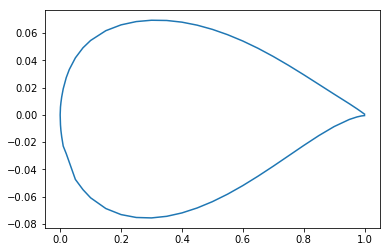

In [3]:
plt.plot(ref_points, test_point, label = 'Original')

In [4]:
## EXERCISE 6 
# Add missing code here.
# ...
sample_size = len(data)
sample_dim = len(data[0])
sample_mean = np.average(data, axis=0)
sample_covariance = np.dot(np.transpose(data - sample_mean), data - sample_mean) / sample_size
temp = np.linalg.eigh(sample_covariance)
lambdas = temp[0][::-1]          # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = temp[1][:, ::-1]    # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue
print("\nNumerical mean of centered data (should be zero):\n", np.average(data - sample_mean)) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)

# SOLUTION

# EXERCISE END


Numerical mean of centered data (should be zero):
 1.05906633811e-18

Variances:
 [  1.12147408e-03   4.76580244e-04   2.04124969e-04   9.40010564e-05
   4.11713214e-05   2.88242290e-05   9.13481076e-06   5.59609407e-06
   3.62731657e-06   1.62530305e-06   1.28835361e-06   4.75313309e-07
   3.96702110e-07   2.65131819e-07   1.83988834e-07   1.21936658e-07
   7.94025665e-08   6.29980698e-08   3.75888382e-08   2.55974212e-08
   1.68451929e-08   1.43906425e-08   9.67658218e-09   8.53050293e-09
   4.72572446e-09   3.19132866e-09   1.76687124e-09   1.54549482e-09
   1.23231312e-09   9.53529310e-10   8.85298184e-10   6.65205941e-10
   4.63995145e-10   2.72681423e-10   2.20387321e-10   1.78053309e-10
   1.45612740e-10   1.04004617e-10   9.43705919e-11   7.42149265e-11
   6.70018732e-11   4.24067435e-11   2.59739215e-11   2.39654430e-11
   1.79607669e-11   1.49914065e-11   1.23602774e-11   1.21169683e-11
   8.33593940e-12   7.49219300e-12   6.60311972e-12   5.63533666e-12
   3.72140907e-12   

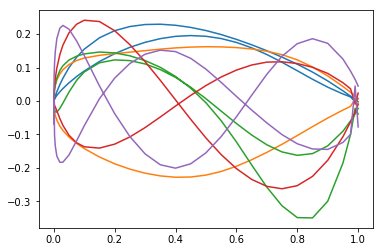

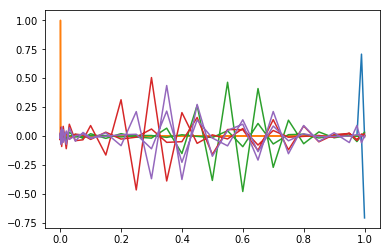

In [5]:
## EXERCISE 7 
# Plot eigen vectors for the biggest 5 and smallest 5 eigenvalues
for i in range(5):
    plt.plot(ref_points, eigen_vectors[:, i], label = 'eigen vector № ' + str(i))
plt.show()
for i in range(5):
    plt.plot(ref_points, eigen_vectors[:, -1 - i], label = 'eigen vector № ' + str(sample_dim - i))
plt.show()
# SOLUTION

# EXERCISE END

### Choose sample dimensionality

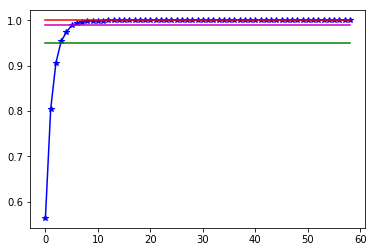

In [6]:
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")

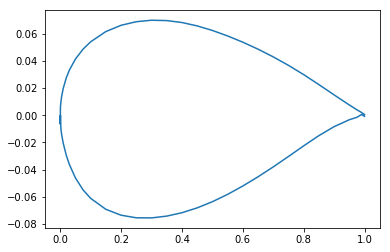

In [14]:
## EXERCISE 8 
# Find coordinates of sample points in the eigen basis
# Plot projections of test airfoil on the different dimensions
eig_data = np.dot(data - sample_mean, eigen_vectors)
test = np.dot(test_point - sample_mean, eigen_vectors[:,:9])
reconstructed = np.dot(test, np.transpose(eigen_vectors[:,:9])) + sample_mean
plt.plot(ref_points, reconstructed, label = 'projection on 9 first components')


# SOLUTION

# EXERCISE END

## Digits

(1797, 64)


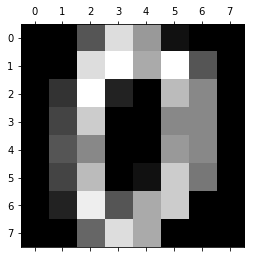

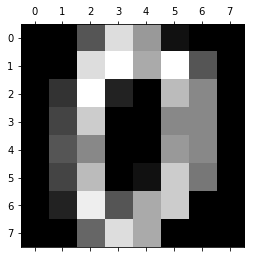

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

plt.gray() 
plt.matshow(digits.data[0].reshape(8, 8)) 
plt.show() 


Numerical mean of centered data (should be zero):
 -2.76783480819e-17

Variances:
 [  1.78907316e+02   1.63626641e+02   1.41709536e+02   1.01044115e+02
   6.94744827e+01   5.90756320e+01   5.18556662e+01   4.39906130e+01
   4.02885629e+01   3.69912020e+01   2.85031708e+01   2.73059660e+01
   2.18893003e+01   2.13124899e+01   1.76269077e+01   1.69374332e+01
   1.58425689e+01   1.49961105e+01   1.22276649e+01   1.08808010e+01
   1.06876155e+01   9.57726524e+00   9.22126826e+00   8.68553268e+00
   8.36095658e+00   7.16179198e+00   6.91588809e+00   6.18950881e+00
   5.88171633e+00   5.15299774e+00   4.48879723e+00   4.24451468e+00
   4.04518650e+00   3.94120891e+00   3.70440987e+00   3.52968776e+00
   3.08285758e+00   2.73627648e+00   2.67062197e+00   2.54029121e+00
   2.28171700e+00   1.90618094e+00   1.81615447e+00   1.68902395e+00
   1.40119202e+00   1.29149979e+00   1.15828926e+00   9.30701800e-01
   6.69477833e-01   4.85794730e-01   2.52210004e-01   9.90976176e-02
   6.30956535e-02  

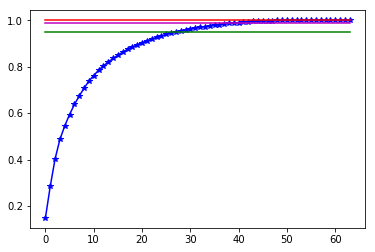

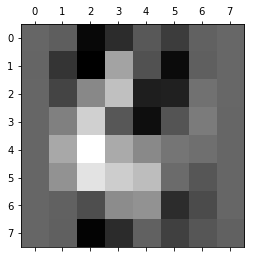

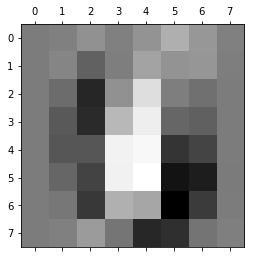

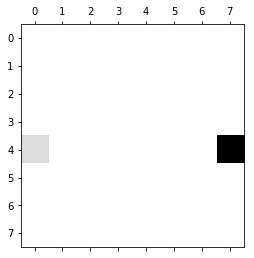

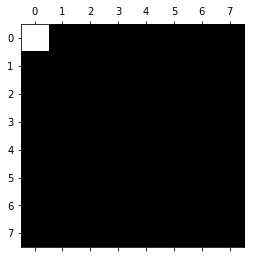

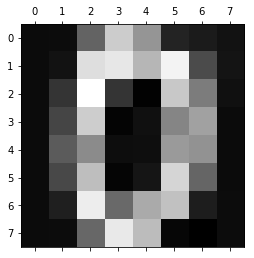

In [34]:
## EXERCISE 9 
# Repeat 6-8 for the new sample
# Ex. 6
sample_size = digits.data.shape[0]
sample_dim = digits.data.shape[1]
sample_mean = np.average(digits.data, axis=0)
sample_covariance = np.dot(np.transpose(digits.data - sample_mean), digits.data - sample_mean) / sample_size
temp = np.linalg.eigh(sample_covariance)
lambdas = temp[0][::-1]          # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = temp[1][:, ::-1]    # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue
print("\nNumerical mean of centered data (should be zero):\n", np.average(digits.data - sample_mean)) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)

# choose dimensionality
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

# Ex. 7
for i in range(2):
    plt.gray()
    plt.matshow(eigen_vectors[:, i].reshape(8, 8), label = 'eigen vector № ' + str(i))
    plt.show()
    
for i in range(2):
    plt.gray()
    plt.matshow(eigen_vectors[:, -1 - i].reshape(8, 8), label = 'eigen vector № ' + str(sample_dim - i))
    plt.show()

# Ex. 8
eig_data = np.dot(digits.data - sample_mean, eigen_vectors)
test = np.dot(digits.data[0] - sample_mean, eigen_vectors[:,:32])
reconstructed = np.dot(test, np.transpose(eigen_vectors[:,:32])) + sample_mean
plt.gray()
plt.matshow(reconstructed.reshape(8, 8), label = 'projection on 32 first components')
plt.show()

# SOLUTION

# EXERCISE END

## Faces

In [35]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState

rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to C:\Users\Home\scikit_learn_data


In [36]:
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [49]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

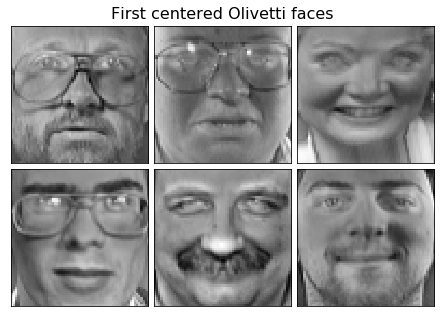

In [38]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])


Numerical mean of centered data (should be zero):
 -9.72068e-11

Variances:
 [  1.12659369e+01   6.31508541e+00   4.40850925e+00 ...,  -1.02069983e-07
  -1.05183837e-07  -1.05654436e-07]

Estimation of covariance matrix:
 [[ 0.03243065  0.03122151  0.02698266 ..., -0.00424569 -0.00313193
  -0.00187004]
 [ 0.03122151  0.0339688   0.03155288 ..., -0.00775363 -0.006443
  -0.00480758]
 [ 0.02698266  0.03155288  0.03472811 ..., -0.01161197 -0.00992677
  -0.00815495]
 ..., 
 [-0.00424569 -0.00775363 -0.01161197 ...,  0.03939127  0.03639135
   0.03292608]
 [-0.00313193 -0.006443   -0.00992677 ...,  0.03639135  0.03949782
   0.03702459]
 [-0.00187004 -0.00480758 -0.00815495 ...,  0.03292608  0.03702459
   0.038271  ]]


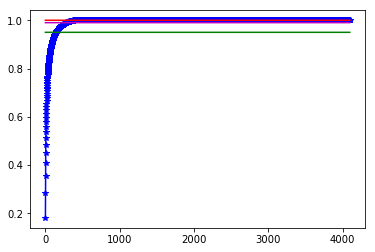

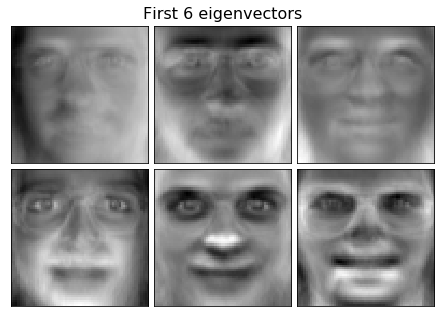

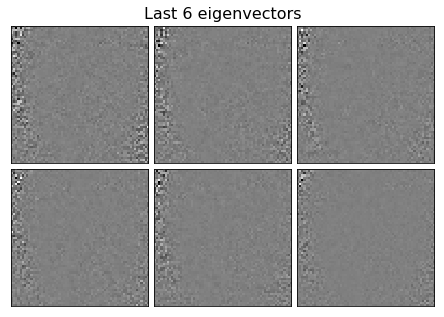

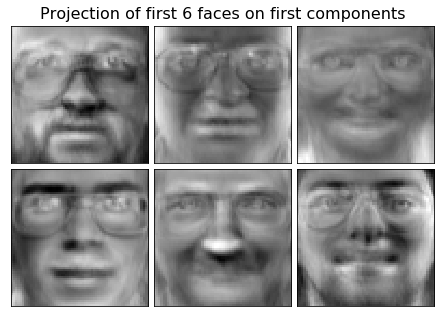

In [55]:
## EXERCISE 10 
# Repeat 6-8 for the new sample
# Ex. 6
sample_size = n_samples
sample_dim = image_shape[0] * image_shape[1]
sample_covariance = np.dot(np.transpose(faces_centered), faces_centered) / sample_size
temp = np.linalg.eigh(sample_covariance)
lambdas = temp[0][::-1]          # Variances along the principal components as components of a list. Arrange it in decreasing order
eigen_vectors = temp[1][:, ::-1]    # Principal components as column (!) vectors in an array. Each eigen vector should correspond to the propper eigenvalue
print("\nNumerical mean of centered data (should be zero):\n", np.average(faces_centered)) # Verify that data has zero mean.
print("\nVariances:\n", lambdas)
print("\nEstimation of covariance matrix:\n", sample_covariance)

# choose dimensionality
plt.plot(range(sample_dim), np.cumsum(lambdas) / np.sum(lambdas), "-*b")
plt.plot(range(sample_dim), [1]*sample_dim, "r")
plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
plt.show()

# Ex. 7
plot_gallery("First 6 eigenvectors", np.transpose(eigen_vectors[:, :6]))
plot_gallery("Last 6 eigenvectors", np.transpose(eigen_vectors[:, -6:]))

# Ex. 8
eig_data = np.dot(faces_centered, eigen_vectors)
test = np.dot(faces_centered[:6], eigen_vectors[:,:32])
reconstructed = np.dot(test, np.transpose(eigen_vectors[:,:32]))
plot_gallery("Projection of first 6 faces on first components", reconstructed)
# SOLUTION

# EXERCISE END